# Top2Vec 실습

In [2]:



!pip install top2vec

#!pip install numpy --upgrade

In [1]:
## 오래걸림 돌리지 말것! 미리 돌리기

# importing libraies
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))


In [8]:
#input : list형태 (document)

newsgroups.data[0] #stopwords, stemming, Lemmetization 처리 안되어있는 날것 그대로의 string..*
# 하나의 document

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [3]:
## 오래걸림 돌리지 말것!
model = Top2Vec(documents=newsgroups.data, speed="learn", workers=8)

2021-05-13 15:58:02,474 - top2vec - INFO - Pre-processing documents for training
2021-05-13 15:58:09,721 - top2vec - INFO - Creating joint document/word embedding
2021-05-13 16:01:27,657 - top2vec - INFO - Creating lower dimension embedding of documents
2021-05-13 16:01:46,083 - top2vec - INFO - Finding dense areas of documents
2021-05-13 16:01:47,659 - top2vec - INFO - Finding topics


## Get Number of Topics

In [9]:
model.get_num_topics()
# 정해진 토픽의 갯수

122

# Get Topic Sizes

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()

topic_sizes: The number of documents most similar to each topic.

topic_nums: The unique index of every topic will be returned.

In [10]:
topic_sizes
# 아래 element는 각각 토픽 별 가까운 document 숫자. 

importance 계산 방법 찾아보기!

array([1260,  772,  678,  633,  536,  497,  462,  404,  391,  350,  345,
        338,  323,  287,  286,  274,  273,  270,  264,  256,  255,  241,
        238,  235,  216,  210,  210,  209,  196,  193,  177,  172,  162,
        160,  159,  159,  136,  135,  133,  133,  129,  128,  127,  118,
        118,  118,  115,  115,  115,  110,  110,  109,  108,  107,  106,
        105,  102,  102,  101,   99,   99,   99,   99,   98,   91,   89,
         88,   87,   85,   85,   84,   83,   83,   79,   77,   76,   74,
         73,   73,   72,   72,   70,   69,   65,   65,   63,   63,   62,
         62,   61,   61,   61,   60,   59,   59,   58,   58,   56,   56,
         56,   56,   55,   54,   54,   54,   53,   52,   52,   52,   52,
         51,   51,   49,   47,   45,   44,   40,   40,   39,   37,   36,
         33], dtype=int64)

In [15]:
topic_nums # 그냥 인덱스

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107], dtype=int64)

# Get Topics

This will return the topics in decreasing size.

In [11]:
topic_words, word_scores, topic_nums = model.get_topics(90) # 토픽 몇개 가져올지
#

topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

topic_nums: The unique index of every topic will be returned.



In [12]:
topic_words[0] #top50토픽

array(['bike', 'car', 'ride', 'cars', 'honda', 'bikes', 'brakes', 'rear',
       'engine', 'riding', 'tires', 'wheel', 'mph', 'gear', 'suspension',
       'brake', 'tire', 'motorcycle', 'throttle', 'passenger', 'wheels',
       'ford', 'miles', 'seat', 'steering', 'toyota', 'bmw', 'valve',
       'cylinder', 'driving', 'torque', 'pedal', 'mileage', 'dealer',
       'front', 'shaft', 'rpm', 'parking', 'exhaust', 'helmet', 'motor',
       'mustang', 'abs', 'truck', 'riders', 'clutch', 'oil', 'owner',
       'motorcycles', 'highway'], dtype='<U15')

In [13]:
word_scores[0] # 코사인 유사도

array([0.68273973, 0.5978107 , 0.59033877, 0.5724665 , 0.5570638 ,
       0.5516704 , 0.5464322 , 0.5364192 , 0.53451985, 0.5329477 ,
       0.5220288 , 0.52063304, 0.5167648 , 0.5061783 , 0.50557   ,
       0.499733  , 0.4895988 , 0.4877648 , 0.48093623, 0.4744566 ,
       0.4722025 , 0.4698405 , 0.46744826, 0.4585483 , 0.45542458,
       0.4512499 , 0.44264352, 0.44152543, 0.43817955, 0.42932075,
       0.42167875, 0.41628116, 0.41482303, 0.4021977 , 0.4007397 ,
       0.40026543, 0.39938262, 0.3964201 , 0.39529094, 0.38930112,
       0.38180405, 0.37995613, 0.37419212, 0.37006888, 0.36959657,
       0.36913678, 0.36758786, 0.36587507, 0.36401695, 0.3621577 ],
      dtype=float32)

In [43]:
topic_nums # 토픽의 인덱스.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

# Search Topics

원하는 키워드와 비슷한 토픽 찾기.

In [14]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)


topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

----설명 스킵-----

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned. 

topic_scores: For each topic the cosine similarity to the search keywords will be returned.
--> 0~1

topic_nums: The unique index of every topic will be returned.

In [15]:
topic_words # 

[array(['symptoms', 'patients', 'disease', 'diet', 'treatment', 'therapy',
        'clinical', 'patient', 'doctor', 'vitamin', 'syndrome',
        'infection', 'diagnosis', 'chronic', 'physician', 'candida',
        'yeast', 'medical', 'diagnosed', 'nutrition', 'treatments',
        'infections', 'dose', 'liver', 'effects', 'placebo', 'foods',
        'doctors', 'physicians', 'pain', 'food', 'bacteria', 'medicine',
        'cure', 'kidney', 'eating', 'immune', 'cancer', 'surgery',
        'breast', 'severe', 'depression', 'toxic', 'diseases', 'illness',
        'skin', 'brain', 'drugs', 'med', 'protein'], dtype='<U15'),
 array(['insurance', 'hospitals', 'health', 'private', 'canadian',
        'doctors', 'care', 'fees', 'canada', 'spending', 'income', 'funds',
        'reform', 'costs', 'medicine', 'hospital', 'coverage', 'money',
        'pay', 'taxes', 'economy', 'paying', 'benefits', 'tax', 'services',
        'basic', 'medical', 'fund', 'americans', 'companies', 'market',
        '

topic_nums# Generating WordCloud 

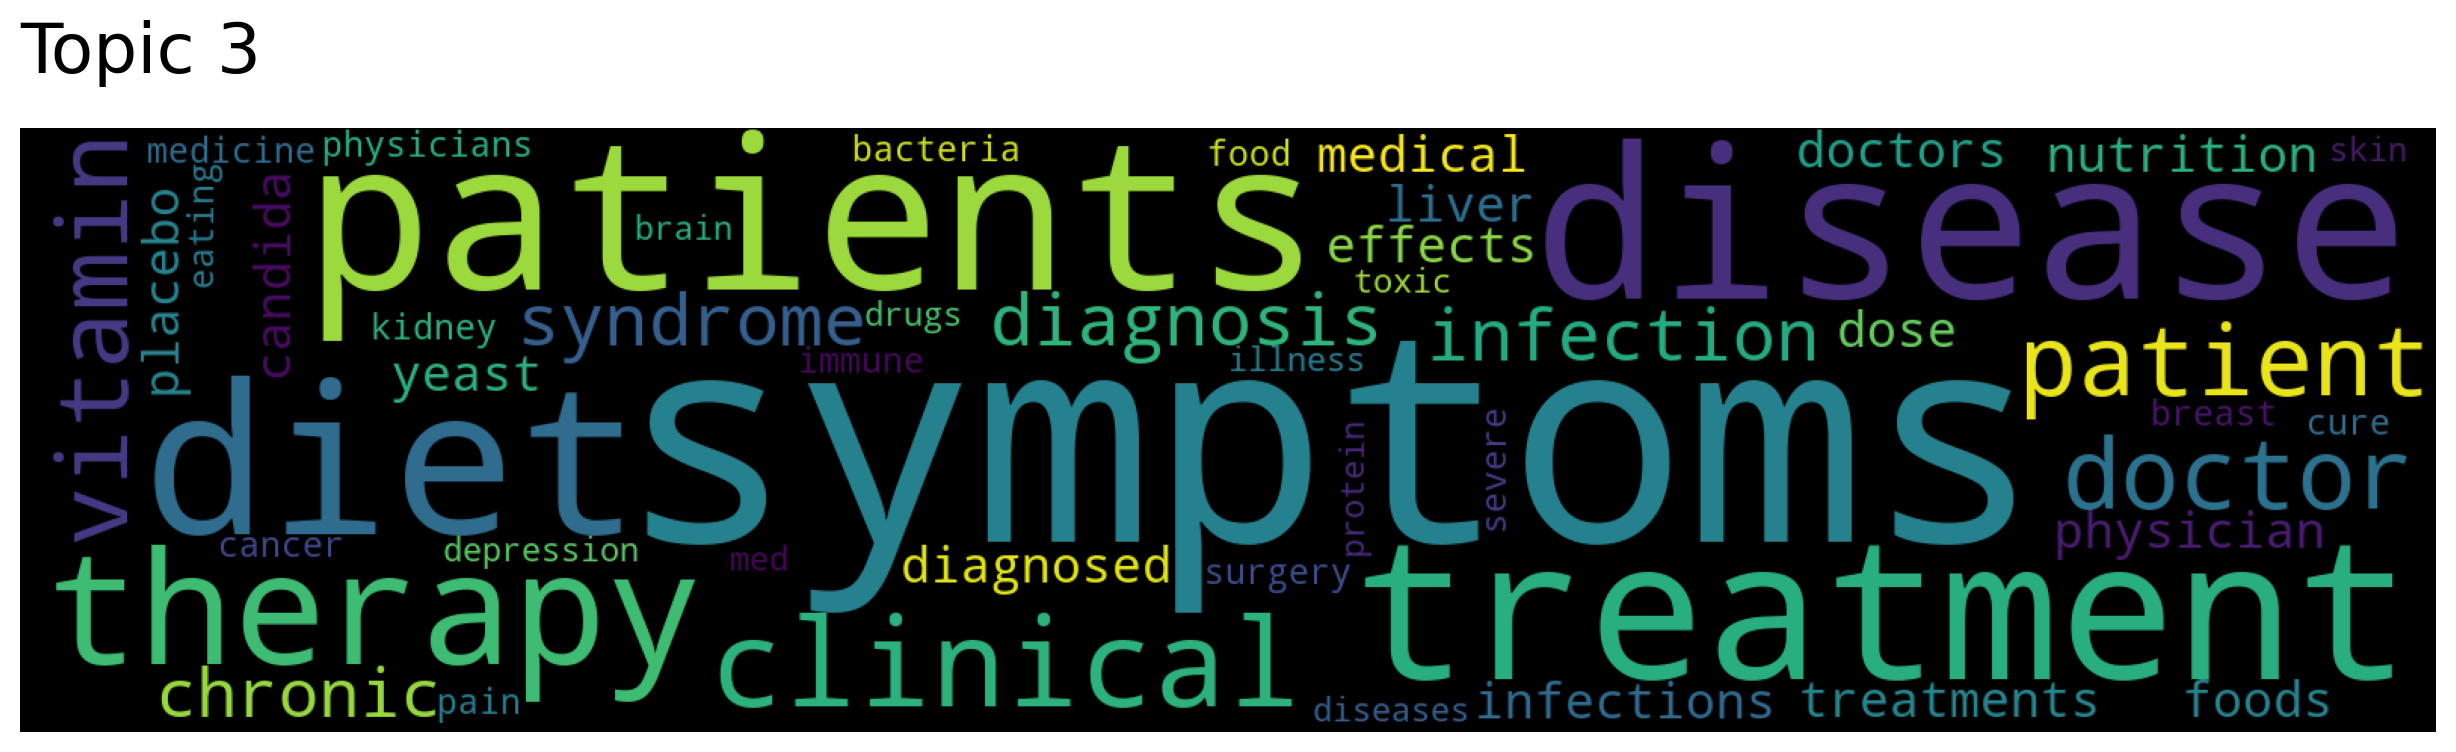

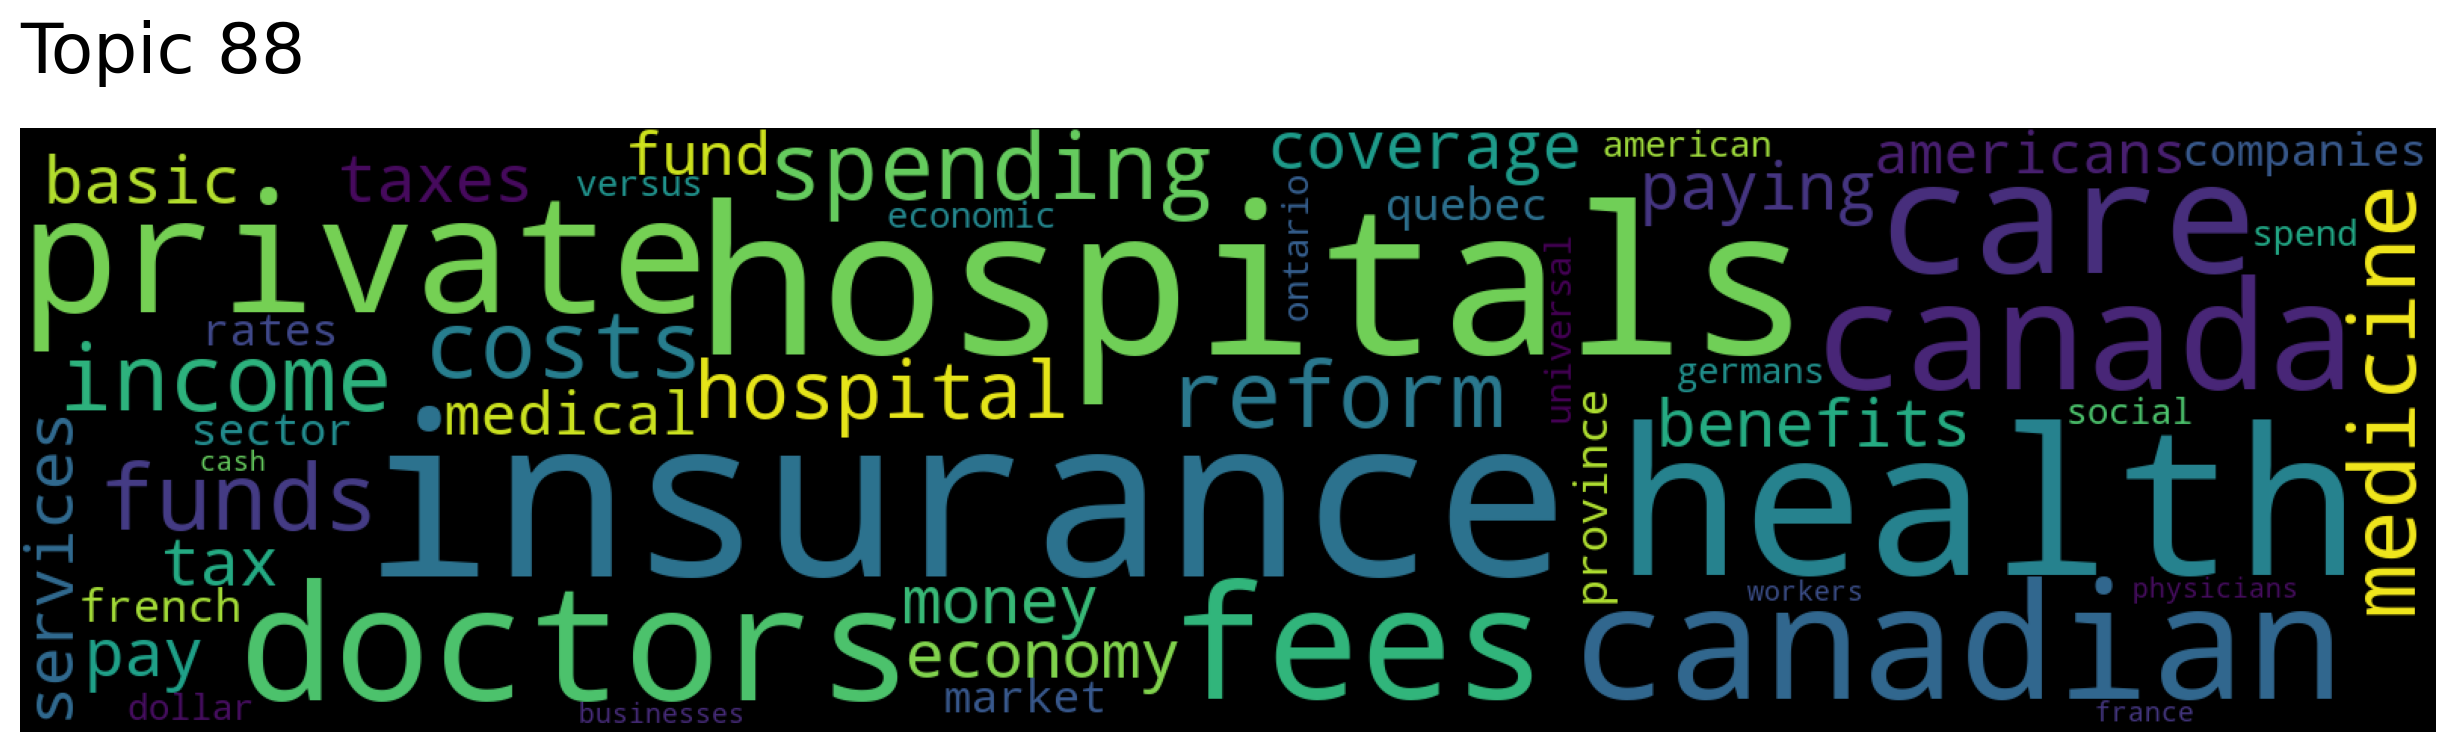

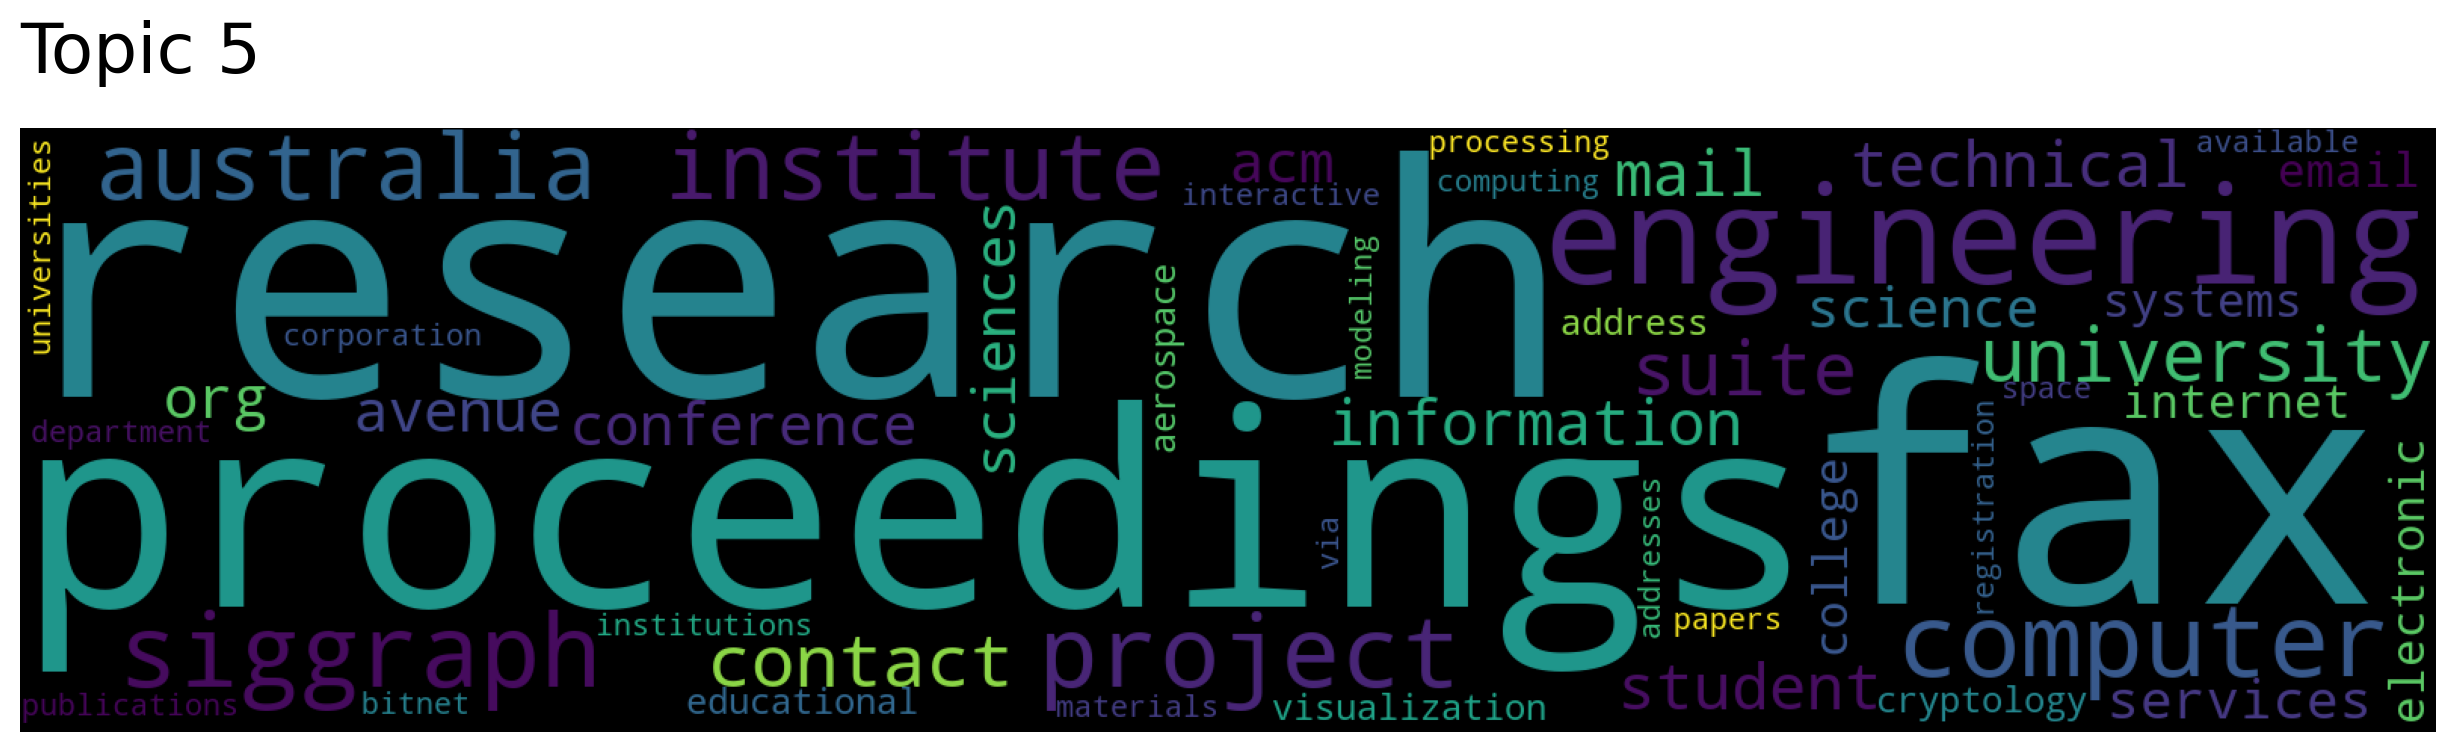

In [16]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=3)
# 해당 키워드와 토픽 유사도 가까운 top3토픽.

for topic in topic_nums:
    model.generate_topic_wordcloud(topic) #토픽 인덱스를 input으로 넣음.

이외에도 topic--> docu확인, document keywords확인 등 가능.

# Similar Keywords

In [17]:
# space와 가까운 키워드
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nasa 0.6810168009624673
shuttle 0.6571697019045788
planetary 0.5746788613086824
launch 0.5639896605715766
missions 0.5340122246701472
orbital 0.509018610325581
exploration 0.5031607732613455
flight 0.4972108835911425
jsc 0.49694979518101595
satellite 0.49578989296321363
solar 0.4940176956357555
orbit 0.4855179729777715
mission 0.47699769032842043
telescope 0.47486915973564386
spacecraft 0.468945578735755
astro 0.45747099529009727
astronomy 0.44963916874791987
lunar 0.44963166207433136
jpl 0.44389736808212465
propulsion 0.44333623031709946
